In [277]:
import geopandas as gpd
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch.utils.data import DataLoader
from torchgeo.datasets import random_bbox_assignment, stack_samples, unbind_samples
from torchgeo.samplers import RandomGeoSampler

In [331]:
with rio.open('../data/unprocessed_data/label/R2F01SEP2024069380009900053SSANSTUC00GTDC.tif') as src:
    label = src.read().transpose(1,2,0)
    label_profile = src.profile

with rio.open('../data/unprocessed_data/img/R2F01SEP2024069380009900053SSANSTUC00GTDC.tif') as src:
    img = src.read().transpose(1,2,0)
    profile = src.profile

In [329]:
img[img == np.nan] = 0

np.float32(0.07071926)

In [266]:
label_profile

{'driver': 'GTiff', 'dtype': 'uint32', 'nodata': 4294967295.0, 'width': 1000, 'height': 1000, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 44N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",81],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32644"]]'), 'transform': Affine(5.0, 0.0, 366298.9431,
       0.0, -5.0, 2880242.5), 'blockxsize': 1000, 'blockysize': 2, 'tiled': False, 'interleave': 'band'}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.07071926..1.130403].


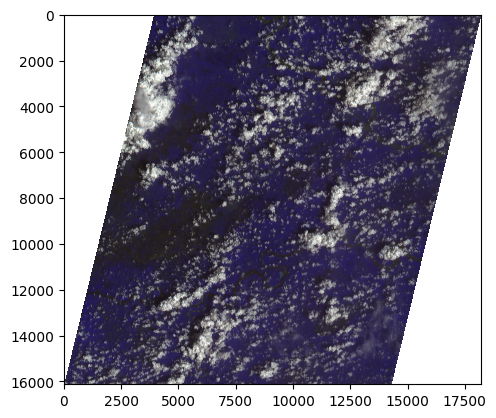

In [90]:
plt.imshow(img)

In [79]:
np.unique(label)

array([         0,          1,          2, 4294967295], dtype=uint32)

In [ ]:
label.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [83]:
np.where(label[:,855] == pow(2, 32) - 1)[0]

array([801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813,
       814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826,
       827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839,
       840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852,
       853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865,
       866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878,
       879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891,
       892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904,
       905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917,
       918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930,
       931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943,
       944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956,
       957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969,
       970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 98

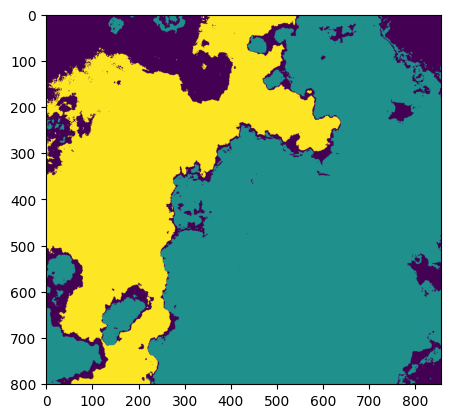

In [86]:
plt.imshow(label[:801, :856])

In [88]:
label[:801, :856].shape

(801, 856, 1)

In [319]:
from torchgeo.samplers import RandomGeoSampler
import torch

class NoDataAwareRandomSampler(RandomGeoSampler):
    def __init__(self, dataset, size, length, nodata_value=4294967295.0, max_nodata_ratio=0.1, **kwargs):
        super().__init__(dataset, size, length, **kwargs)
        self.nodata_value = nodata_value
        self.max_nodata_ratio = max_nodata_ratio
        self.dataset = dataset
    
    def __iter__(self):
        generated = 0
        while generated < self.length:
            # Get a random query from parent sampler
            query = next(super().__iter__())
            
            try:
                # Check the sample for nodata
                sample = self.dataset[query]
                if 'mask' in sample:
                    mask = sample['mask']
                    nodata_ratio = (mask == self.nodata_value).float().mean().item()


                    
                    # Skip if too much nodata
                    if nodata_ratio > self.max_nodata_ratio:
                        continue
                
                yield query
                generated += 1
            except Exception as e:
                # Skip problematic samples
                print(f"Skipping sample {query} due to error: {e}")
                continue

# Usage


In [375]:
class Liss4(RasterDataset):
    filename_glob = '*.tif'
    filename_regex = r'^.{3}(?P<date>\d{2}[A-Z]{3}\d{4})'
    date_format = '%d%b%Y'
    single_band = False
    is_image = True
    seprate_files = False

    def plot(self, sample):
        plt.imshow(sample['image'].permute(1, 2, 0).numpy())

class Liss4_GT(RasterDataset):
    filename_glob = '*.tif'
    filename_regex = r'^.{3}(?P<date>\d{2}[A-Z]{3}\d{4})'
    date_format = '%d%b%Y'
    single_band = False
    is_image = False
    all_bands = ['B1']
    separate_files = False


    def plot(self, sample):
        # print(sample)
        plt.imshow(sample['mask'])


from torchgeo.datasets import RasterDataset, IntersectionDataset

raster1 = Liss4("../data/unprocessed_data/train/img")
raster2 = Liss4_GT("../data/unprocessed_data/train/label")

intersection = raster1 & raster2

In [367]:
!pwd

/Users/nischal/projects/cloudSnip/notebooks


In [376]:
val_img = Liss4("../data/unprocessed_data/test/img")
val_mask = Liss4_GT("../data/unprocessed_data/test/label")

val_dataset = val_img & val_mask

In [341]:
from torch.utils.data import random_split

total_len = len(intersection)
train_len = int(0.8 * total_len)
test_len = total_len - train_len

train_dataset, test_dataset = random_split(intersection, [train_len, test_len])


[0 1 2]


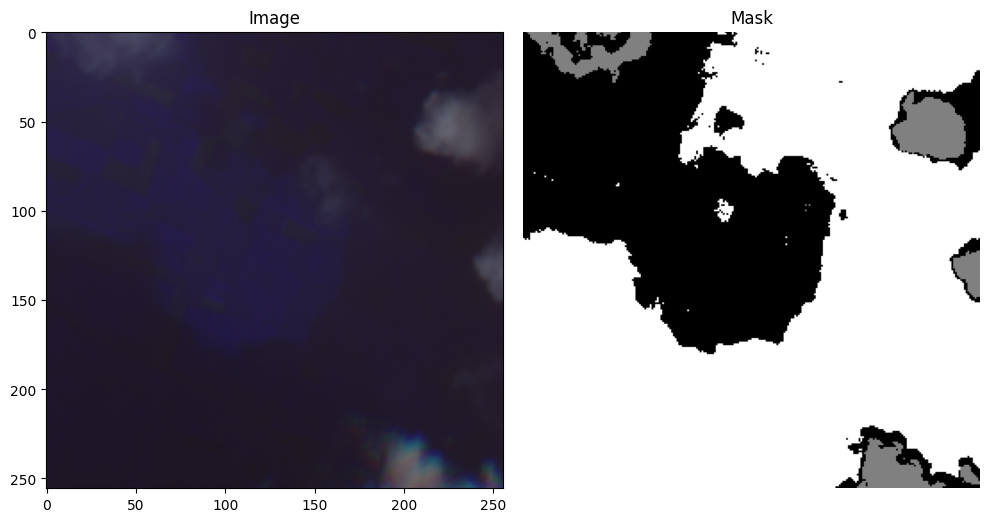

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.11933874..1.1270881].


[0 1 2]


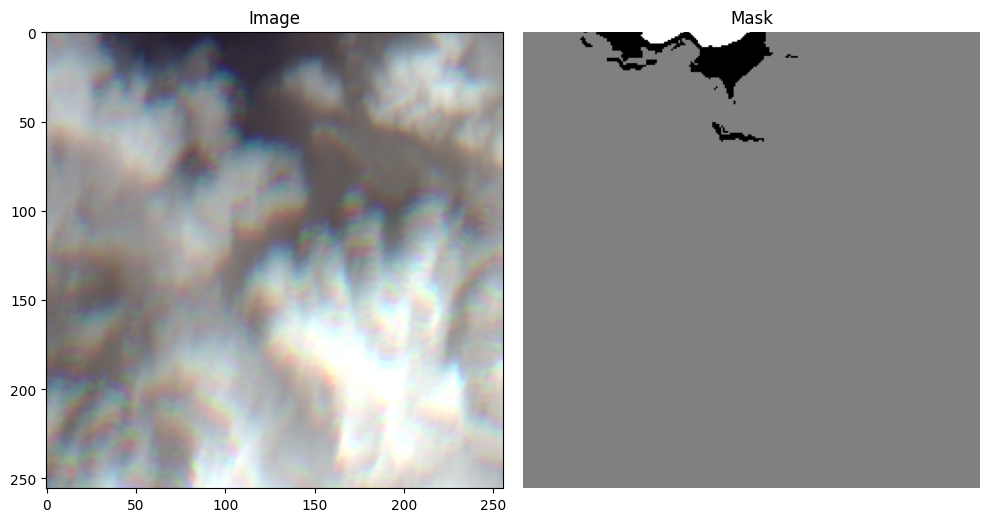

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.19005801..1.1270881].


[0 1]


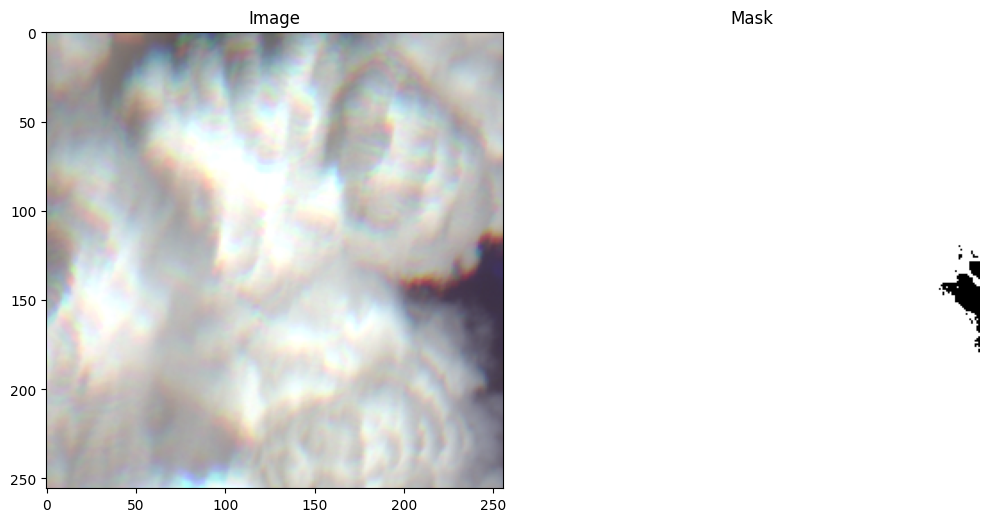

[0 1 2]


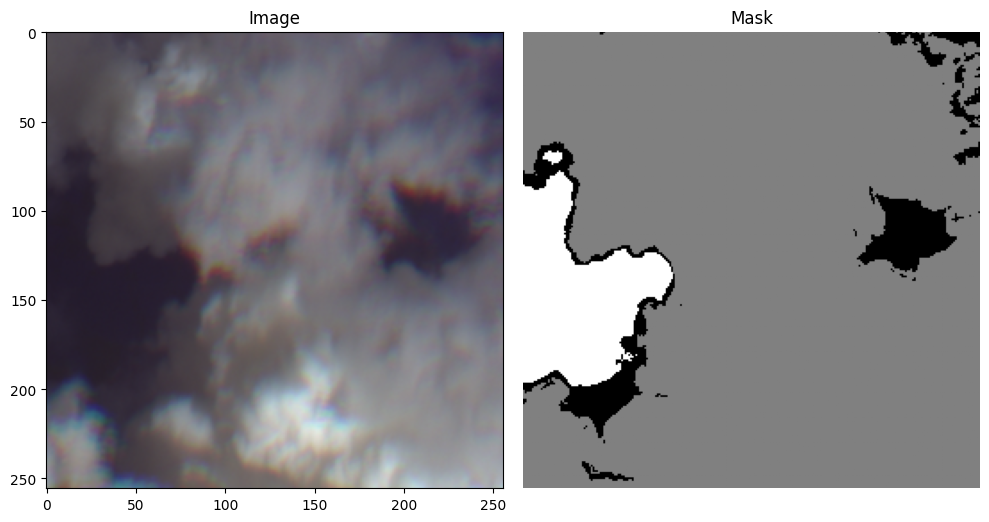

[0 1 2]


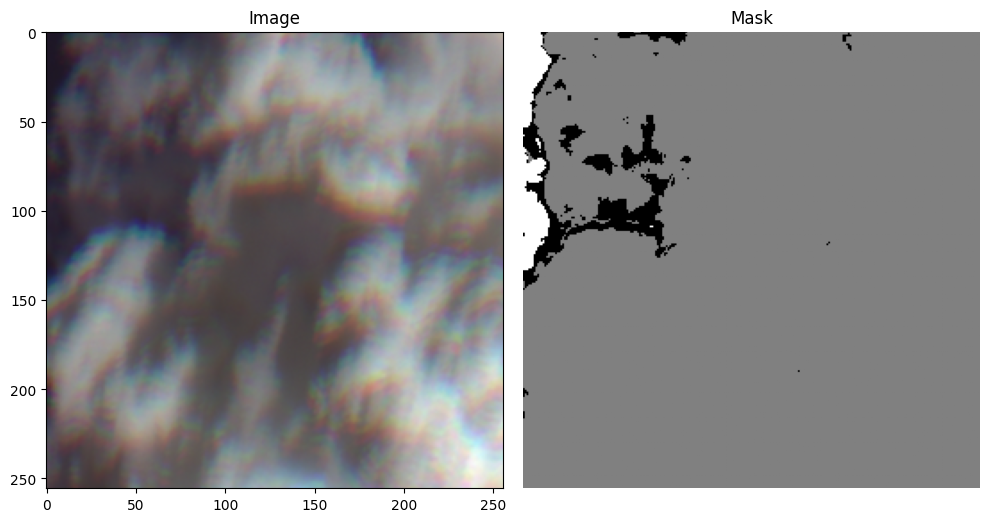

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.18121807..1.128193].


[0 1]


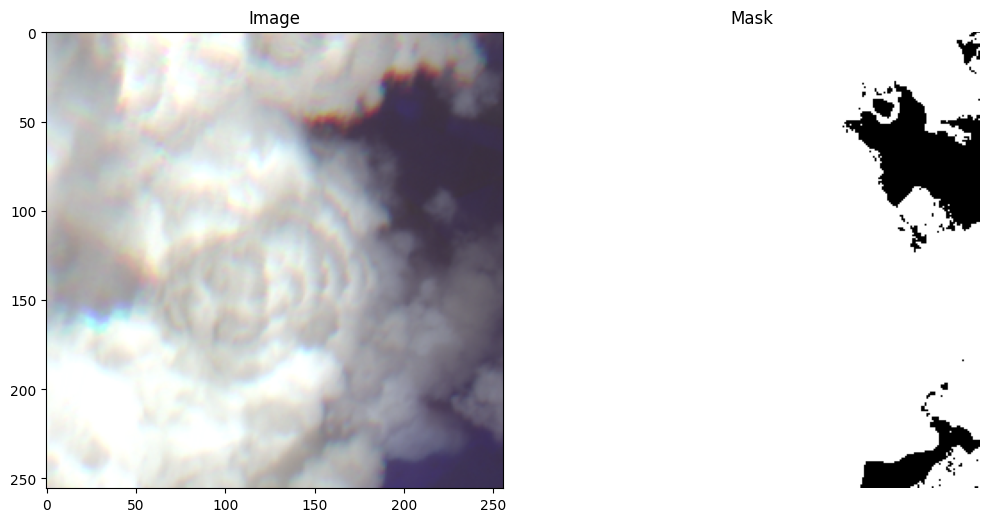

[0 1 2]


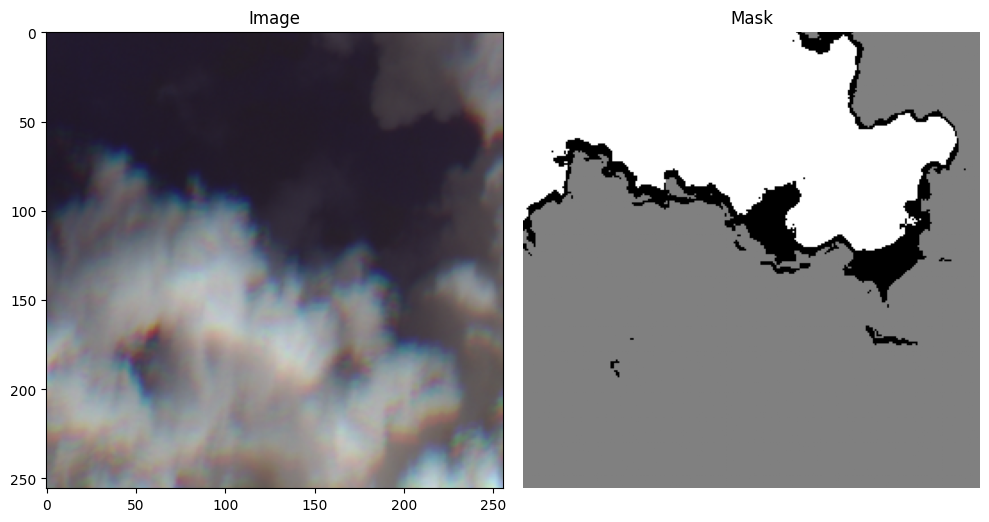

[0 1 2]


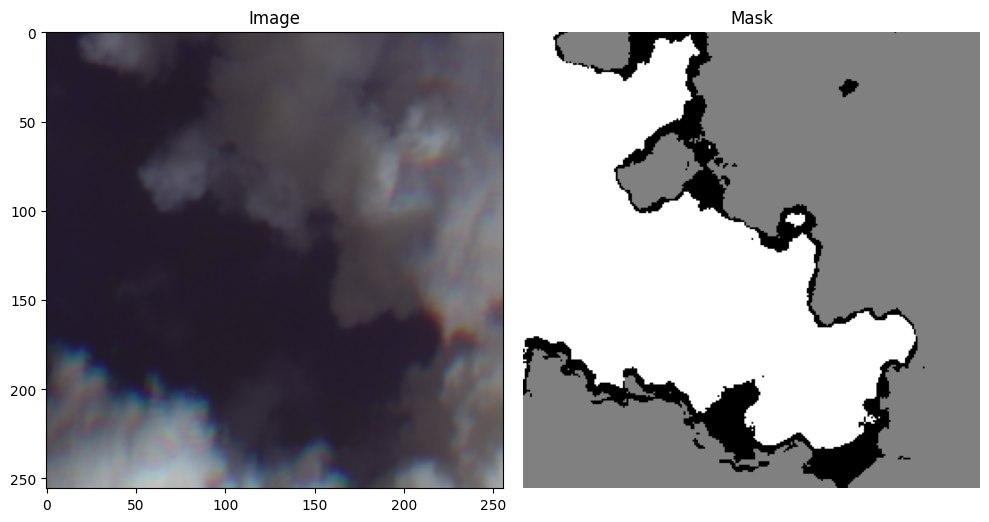

[0 1 2]


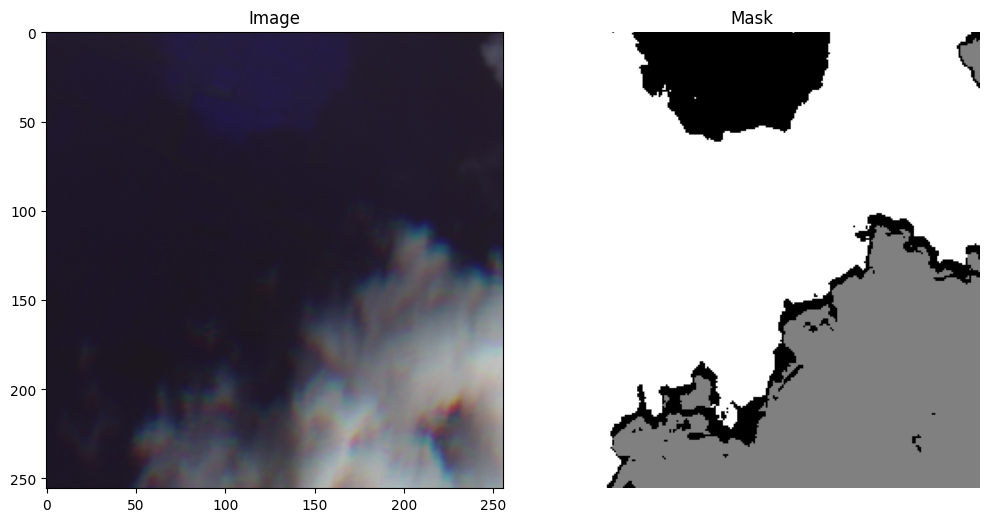

[0 1 2]


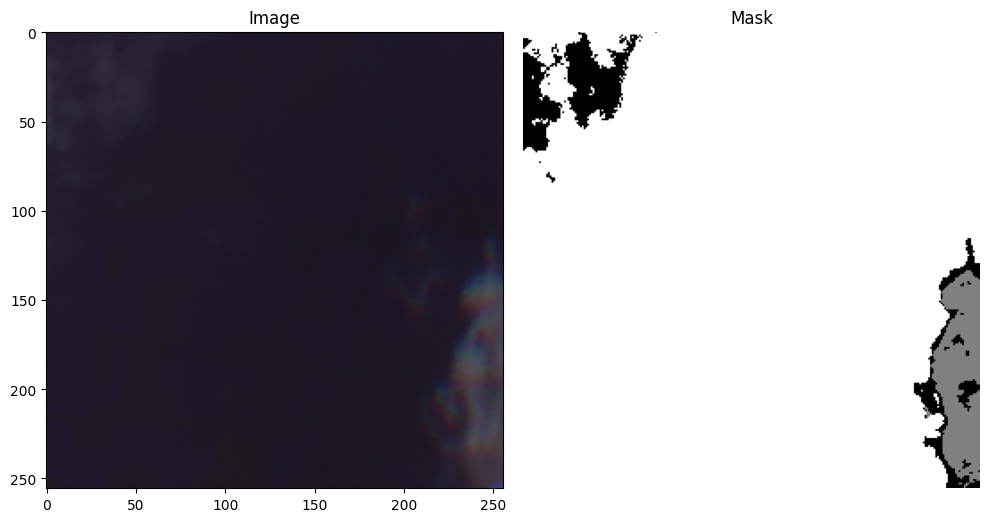

In [ ]:
# sampler = RandomGeoSampler(intersection, size=256, length=32)
sampler = NoDataAwareRandomSampler(
    intersection, 
    size=256, 
    length=10,
    nodata_value=4294967295.0,
    max_nodata_ratio=0.01  # Allow up to 1% nodata
)


train_dataloader = DataLoader(intersection, sampler=sampler, collate_fn=stack_samples, num_workers=0)

# print(len(dataloader))

for batch in dataloader:
    sample = unbind_samples(batch)[0]
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(sample['image'].permute(1, 2, 0).numpy())
    ax[0].set_title('Image')
    print(np.unique(sample['mask']))
    ax[1].imshow(sample['mask'].squeeze().numpy(), cmap='gray')
    ax[1].set_title('Mask')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.15174253..1.3562173].


[0 1 2]


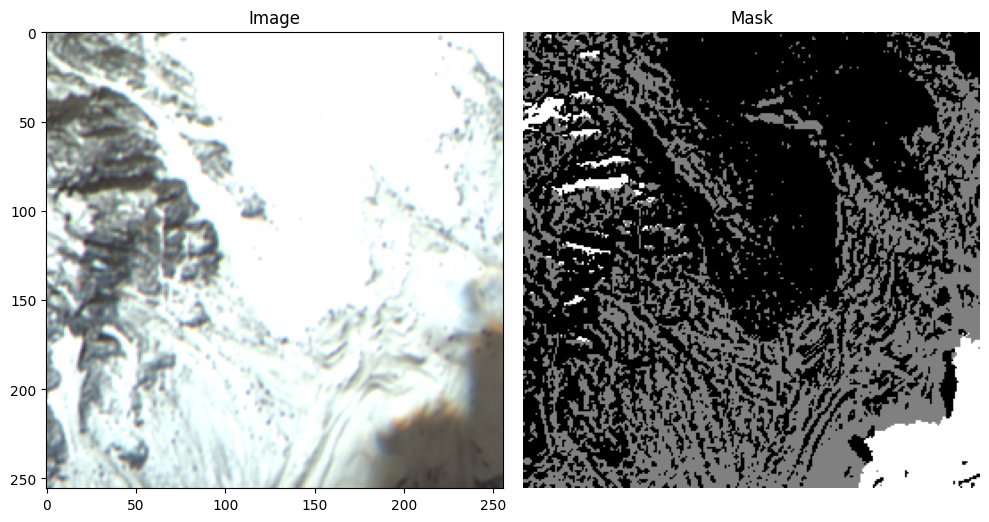

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1625813..1.6310384].


[0 1 2]


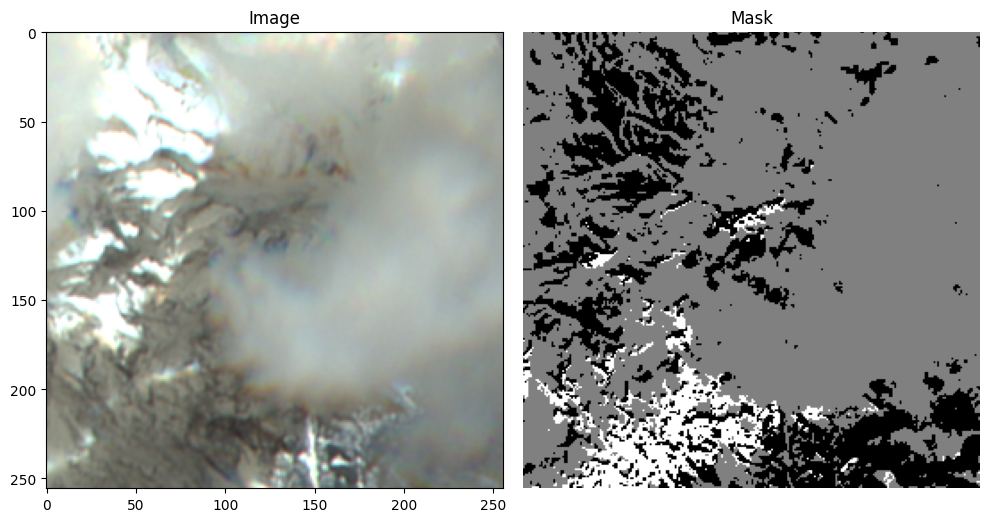

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.08206484..1.281414].


[0 1 2]


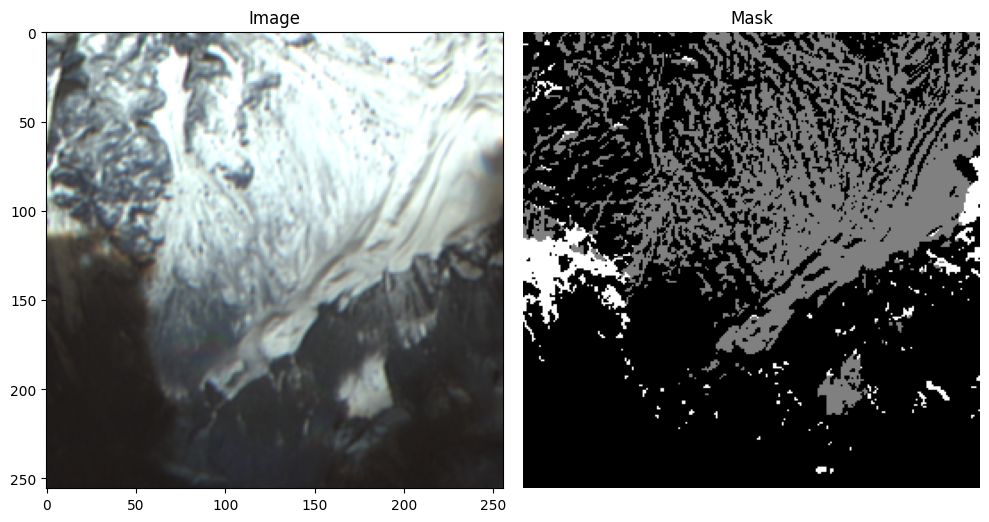

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.080516435..1.1919752].


[0 1 2]


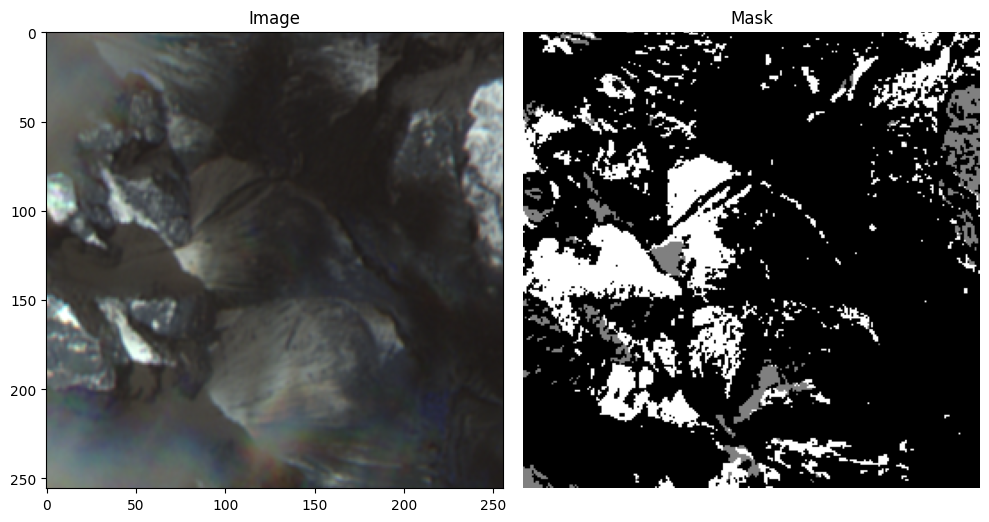

In [404]:
# sampler = RandomGeoSampler(intersection, size=256, length=32)
sampler = NoDataAwareRandomSampler(
    val_dataset, 
    size=256, 
    length=100,
    nodata_value=4294967295.0,
    max_nodata_ratio=0.01  # Allow up to 1% nodata
)

def collate_fn(sample):
    # print(sample[0]['image'].shape)
    samples = stack_samples(sample)
    samples['chn_ids'] = torch.tensor([[842, 664, 559]]).repeat(32,1,1,1)
    return samples


val_dataloader = DataLoader(val_dataset, sampler=sampler, batch_size = 32,collate_fn=collate_fn, num_workers=0)

# print(len(dataloader))

for batch in dataloader:
    sample = unbind_samples(batch)[0]
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(sample['image'].permute(1, 2, 0).numpy())
    ax[0].set_title('Image')
    print(np.unique(sample['mask']))
    ax[1].imshow(sample['mask'].squeeze().numpy(), cmap='gray')
    ax[1].set_title('Mask')
    
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
from torchgeo.models import panopticon_vitb14

model = panopticon_vitb14(img_size=224)


In [ ]:
for data, label in dataloader:
    print()

Panopticon(
  (model): VisionTransformer(
    (patch_embed): PanopticonPE(
      (conv3d): Conv3dWrapper(
        (conv3d): Conv3d(1, 2304, kernel_size=(1, 14, 14), stride=(1, 14, 14))
      )
      (chnfus): ChnAttn(
        (chnemb): ChnEmb()
        (xattn): CrossAttnNoQueryProj(
          (inproj_q): Identity()
          (inproj_k): Linear(in_features=2304, out_features=2304, bias=False)
          (inproj_v): Linear(in_features=2304, out_features=2304, bias=False)
        )
      )
      (proj): Linear(in_features=2304, out_features=768, bias=True)
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (patch_drop): Identity()
    (norm_pre): Identity()
    (blocks): Sequential(
      (0): Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (q_norm): Identity()
          (k_norm): Identity()
          (attn_drop): Dropout(p=0.0, inplace=False)
     

In [405]:
# Memory usage of objects
import sys
x = []
print(sys.getsizeof(x))  # Memory allocated for an empty list
x.append(1)
print(sys.getsizeof(x))  # Memory allocated after adding an element

56
88
